In [3]:
import re
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from operator import itemgetter
wordnet_lemmatizer = WordNetLemmatizer()
stop_words = stopwords.words('english')
# stop_words+=["polyurethane","poly","composite","protein","drug","acid","biocompatibility","tissue","shape","approach","enhanced","controlled","device","different","technique","process","study","response","-","","preparation","high","use","development","formation","release","method","structure","system","design","matrix","mechanical","delivery","characterization","biomaterial","biomaterials","cell","cells","biomedical","applications","application","properties","using","engineering","materials","study","effect","effects","based","human","novel","evaluation","review","surface","surfaces","new","analysis","biomedical applications","potential","behavior","model","material","biological","growth","via","influence","activity"]

def openfile(path):
    f=open(path)
    text=f.read()
    f.close() 
    all_articles=text.split("\n\n")
    return all_articles



def get_wordnet_pos(pos_tag):  
    # if pos tag starts with 'J'
    if pos_tag.startswith('J'):
        # return wordnet tag "ADJ"
        return wordnet.ADJ   
    # if pos tag starts with 'V'
    elif pos_tag.startswith('V'):
        # return wordnet tag "VERB"
        return wordnet.VERB   
    # if pos tag starts with 'N'
    elif pos_tag.startswith('N'):
        # return wordnet tag "NOUN"
        return wordnet.NOUN  
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        # be default, return wordnet tag "NOUN"
        return wordnet.NOUN




def get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date):
    pattern=r'\w[\w\.@_-]*\w'
    for art in all_articles:
        if ("\nDE " in art) and ("\nTI " in art) and ("\nID " in art) and ("\nSO " in art) and ("\nPY " in art):
            DEs = re.findall(r'\sDE[ ].*[\s\w;-]*\sID', art)
            TIs = re.findall(r'\sTI[ ].*[\s\w;:,.!\/)(-]*\sSO', art)
            years = re.findall(r'\sPY [0-9]+', art)
            if len(DEs)==1 and len(TIs)==1 and len(years)==1:
                sentence = ""
                for DE in DEs:
                    DE=DE.split("ID")[0]
                    DE=DE.split("DE")[1].strip().lower()
                    DE=re.sub(r"\s+", ' ',DE)
#                     sentence = sentence + DE + ". "
                    keyword=DE.split("; ")
                for TI in TIs:
                    TI=TI.split("SO")[0]
                    TI=TI.split("TI")[1].strip().lower()
                    TI=re.sub(r"\s+", ' ',TI)
#                     sentence = sentence + TI
#                     sentence=re.sub('[^a-zA-Z0-9;.,-]',' ',sentence)
#                     sentence=re.sub('\s+',' ',sentence)
                    TI=re.sub('[^a-zA-Z0-9;.,-]',' ',TI)
                    TI=re.sub('\s+',' ',TI)
                    title=TI.split(" ")
                
                tokens = keyword + title
                
#                 tokens = nltk.regexp_tokenize(sentence, pattern)
    
#                 tagged_tokens= nltk.pos_tag(tokens)
#                 lemmatized_words=[wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(tag)) \
#                       for (word, tag) in tagged_tokens if word not in stop_words]
                lemmatized_words=[wordnet_lemmatizer.lemmatize(word) \
                      for word in tokens if word not in stop_words]
    
                new_str = ""
                for word in lemmatized_words:
                    new_str = new_str + word + " "
                new_str = new_str.strip()                
                keywords_titles.append(new_str)
                
                year = years[0]
                year = year.split("PY")[1].strip()
                publish_date.append(year)
                
                if year not in split_doc_by_date:
                    split_doc_by_date[year] = [new_str]
                else:
                    split_doc_by_date[year].append(new_str)
                


if __name__ == "__main__":
    split_doc_by_date = {}
    keywords_titles = []
    publish_date = []
    count = 0
    
    for i in range(1,42):
        path = "/Users/Jingsi/Desktop/A_Wiley/data_new/biomaterial_data/savedrecs%d.txt"%i
#         path = "/Users/Jingsi/Desktop/A_Wiley/data_new/Review/biomaterial_data/savedrecs%d.txt"%i
        all_articles = openfile(path)
        get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date)
        count += len(all_articles)
        
    for i in range(1,48):
        path = "/Users/Jingsi/Desktop/A_Wiley/data_new/biomedical_data/savedrecs%d.txt"%i
#         path = "/Users/Jingsi/Desktop/A_Wiley/data_new/Review/biomedical_data/savedrecs%d.txt"%i
        all_articles = openfile(path)
        get_key_tis(all_articles,keywords_titles,publish_date,split_doc_by_date)
        count += len(all_articles)
    
    print(("len of total: ",len(keywords_titles)))
    print(("len of total: ",len(publish_date)))
    print("total count:", count)

('len of total: ', 27946)
('len of total: ', 27946)
total count: 43568


In [4]:
print(len(split_doc_by_date["2018"]))
print(split_doc_by_date["2018"][0])

2986
fire retardancy thermal analysis thermal properties biomaterial preparation novel agar sodium alginate fire-retardancy film


In [5]:
# topics = [['regeneration'],['microstructure'],['implantation'],['polymerization']]
# topics = [['regeneration'],['microstructure']]
topics=[['bone'],['polymer'],['chitosan'],['tissue engineering'],['hydrogel'],['scaffold'],['nanoparticles'],['adhesion'],['regeneration'],['microstructure']]

In [6]:
total_list = []
for idx, topic in enumerate(topics):
    temp_dic = {}
    for key, value in split_doc_by_date.items():
        for key_ti in value:
            for topic_word in topic:
                if topic_word in key_ti:
                    # do something
                    if key not in temp_dic:
                        temp_dic[key] = 1
                    else:
                        temp_dic[key] += 1
                    break;
    total_list.append(temp_dic) 
    #print(idx,temp_dic)

In [10]:
import math
"""Count the TF"""
tf_list = []
for topic_list in total_list:    # get a dic topic
    temp_dic = {}
    for key, value in topic_list.items():
#         temp_dic[key] = int(value)/ int(year_dic[key])
          temp_dic[key] = int(value)/ len(split_doc_by_date[key])
#     print(temp_dic)  
    tf_list.append(temp_dic)
"""
Count the IDF
"""
idf_list = []
year_dic = {}
for topic_list in total_list:    # get a dic 
    for key, value in topic_list.items():
        if key not in year_dic:
            year_dic[key] = value
        else:
            year_dic[key] = int(year_dic[key]) + int(value)
# print("Year count: ")
# print(year_dic)
# year_dic_res=list(islice(year_dic.items(), 19))
# print(year_dic_res)
for topic_list in total_list:    # get a dic topic
    temp_dic = {}
    for key, value in topic_list.items():
#         print(year_dic[key])
        temp_dic[key]=1 + math.log(year_dic[key]/int(value))  
    idf_list.append(temp_dic)
# print(len(idf_list[0]))
# print(idf_list[0])
"""Count the TF_IDF"""
tf_idf_list=[]
# print(tf_list[0])
# print(idf_list[0])
for i in range(0,10):
    temp_dic={}
    for key, value in tf_list[i].items():
        temp_dic[key]=tf_list[i][key]*idf_list[i][key]
    tf_idf_list.append(temp_dic) 
print(tf_idf_list[0])

{'2018': 0.27928635150098935, '2017': 0.26283077309662345, '2016': 0.26393180245202646, '2015': 0.23310340530205195, '2014': 0.24853572736312834, '2013': 0.25739193966560026, '2012': 0.24628717804592962, '2011': 0.24951725461782315, '2010': 0.28591307843503433, '2009': 0.310103806731282, '2008': 0.2794767667261654, '2007': 0.31357070109008295, '2006': 0.25531504882806993, '2005': 0.2997617830149267, '2004': 0.36014967114607754, '2003': 0.29535867517817027, '2002': 0.31323403141550676, '2001': 0.3192057065339082, '2000': 0.3339679729982258, '1999': 0.29674837450902575, '1998': 0.21639716767977832, '1997': 0.3003683957993824, '1996': 0.1532954040026188, '1995': 0.1700198466788957, '1994': 0.20466179705365495, '1993': 0.17051980249728035, '1992': 0.17321216188276015, '1991': 0.09991326804175686}


In [35]:
# tf_set=[]
# # topic_dic = total_percent_list[0]
# topic_dic = tf_idf_list[0]
# # print(topic_dic)
# for it in topic_dic:
#     tf_set.append([it, topic_dic[it]])
# tf_res=pd.DataFrame(tf_set, columns=['year','percent']).groupby('year').mean()
# #tf_res

In [36]:
# # topic_dict = total_percent_list[0]
# topic_dic = tf_idf_list[0]
# sortedvalue = sorted(topic_dic.items(), key=itemgetter(0), reverse=False)
# sortedvalue

In [14]:
import csv
for i in range(0, 10):
#     topic_dict_sort = sorted(total_percent_list[i].items(), key=itemgetter(0), reverse=False)
    topic_dict_sort = sorted(tf_idf_list[i].items(), key=itemgetter(0), reverse=False)
#     with open('/Users/Jingsi/Desktop/A_Wiley/for_tableau/review_trend/topic%d.csv'%i,'w') as out:
    with open('/Users/Jingsi/Desktop/A_Wiley/for_tableau/all_trend/topic%d.csv'%i,'w') as out:
        csv_out=csv.writer(out)
        csv_out.writerow(['year','percent'])
        for row in topic_dict_sort:
            csv_out.writerow(row)

In [15]:
# df_0=pd.read_csv('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic0.csv')
# df_1=pd.read_csv('/Users/Jingsi/Desktop/A_Wiley/Topic_trend/micro_reg/topic1.csv')
# df_sum=pd.merge(df_0,df_1,how='outer', left_on='year', right_on='year')
# df_sum
df_sum=pd.DataFrame(columns=['year','percent'])
for i in range(0, 10):
#     path='/Users/Jingsi/Desktop/A_Wiley/for_tableau/review_trend/topic%d.csv'%i
    path='/Users/Jingsi/Desktop/A_Wiley/for_tableau/all_trend/topic%d.csv'%i
    df=pd.read_csv(path)
    df_sum=df.merge(right=df_sum, how='outer', left_on='year',right_on='year')
df_sum.head()

,year,percent,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y,percent_x,percent_y
0,1991,0.099913,NaN,0.099913,NaN,NaN,NaN,NaN,NaN,0.263525,0.099913,NaN
1,1994,0.129513,NaN,0.259291,NaN,NaN,0.078348,NaN,0.129513,0.233950,0.204662,NaN
2,1996,0.078771,0.078771,0.302942,0.045987,NaN,0.131137,NaN,NaN,0.323069,0.153295,NaN
3,1997,0.038097,0.089878,0.259682,NaN,0.065926,0.089878,0.111314,0.065926,0.280954,0.300368,NaN
4,1998,0.084567,NaN,0.199619,NaN,NaN,0.049901,0.113484,0.068167,0.271128,0.216397,NaN


In [16]:
# column_name = ['year','polymerization','implantation','microstructure','regeneration','None']
# column_name = ['year','microstructure','regeneration','None']
column_name=['year','microstructure','regeneration','adhesion','nanoparticles','scaffold','hydrogel','tissue engineering','chitosan','polymer','bone','None']
df_sum.columns = column_name

In [26]:
df_res=df_sum.drop(['None'],axis=1)
df_res=df_res.groupby('year',as_index=False).mean()
df_res=df_res.loc[df_res['year']>=2000]
df_res=df_res.loc[df_res['year']<=2018]
df_res

,year,microstructure,regeneration,adhesion,nanoparticles,scaffold,hydrogel,tissue engineering,chitosan,polymer,bone
10,2000,0.078825,0.121275,0.289964,0.025605,0.107886,0.201256,0.248442,0.121275,0.390617,0.333968
11,2001,0.096206,0.083665,0.257350,0.022899,0.070352,0.130328,0.220742,0.130328,0.319206,0.319206
12,2002,0.080762,0.070007,0.308333,0.033441,0.128278,0.110314,0.266203,0.091020,0.382615,0.313234
13,2003,0.051072,0.079484,0.240540,0.029037,0.186188,0.148276,0.255170,0.134462,0.338206,0.295359
14,2004,0.102019,0.150078,0.258380,0.042589,0.196568,0.155581,0.304047,0.114807,0.363185,0.360150
15,2005,0.064734,0.100269,0.227817,0.105712,0.242065,0.145761,0.255747,0.145761,0.378227,0.299762
16,2006,0.092178,0.102143,0.220831,0.106982,0.224116,0.155259,0.272737,0.171032,0.354975,0.255315
17,2007,0.103392,0.138953,0.224071,0.170795,0.241839,0.161568,0.279462,0.164673,0.350289,0.313571
18,2008,0.088982,0.147979,0.185162,0.147979,0.283318,0.185162,0.269693,0.177538,0.369555,0.279477
19,2009,0.124989,0.137938,0.212818,0.204532,0.236639,0.238559,0.290477,0.189569,0.385325,0.310104


In [34]:
df_res.to_csv('TF_IDF_without_ab.csv', sep='\t', encoding='utf-8',index=False)
df_try=pd.read_csv('TF_IDF_without_ab.csv', sep='\t')
df_try.tail()

,year,microstructure,regeneration,adhesion,nanoparticles,scaffold,hydrogel,tissue engineering,chitosan,polymer,bone
14,2014,0.108603,0.145830,0.124573,0.257464,0.289583,0.229064,0.291201,0.155358,0.367580,0.248536
15,2015,0.094915,0.150176,0.121349,0.277171,0.248966,0.248103,0.267462,0.166934,0.349361,0.233103
16,2016,0.094261,0.198796,0.108827,0.262412,0.277353,0.263172,0.288198,0.200592,0.362656,0.263932
17,2017,0.098838,0.173926,0.138615,0.280267,0.269380,0.278368,0.271323,0.182211,0.353193,0.262831
18,2018,0.129061,0.184963,0.110344,0.291198,0.275715,0.307438,0.298044,0.173919,0.342972,0.279286


In [27]:
# df_res=df_res.fillna(df_res.mean())

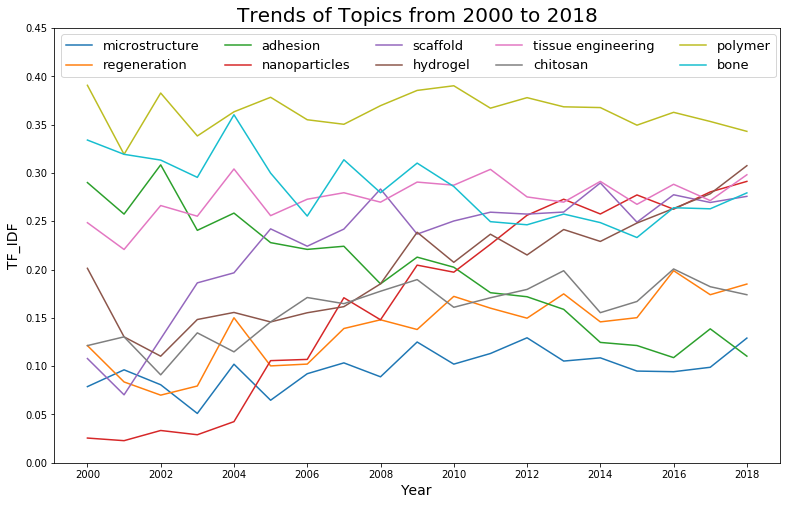

In [37]:
# column_name_0=['microstructure','regeneration']
# column_name_0=['polymerization','implantation','microstructure','regeneration']
column_name_0=['microstructure','regeneration','adhesion','nanoparticles','scaffold','hydrogel','tissue engineering','chitosan','polymer','bone']
plt.figure(figsize=(13,8))

for column in df_res.drop('year', axis=1):
    plt.plot(df_res['year'], df_res[column], label=column)
plt.legend(column_name_0, ncol=5,loc=2,prop={'size': 13})

plt.xlabel('Year', fontsize=14)
plt.ylabel('TF_IDF', fontsize=14)
plt.xticks(np.arange(2000, 2020, 2))
# plt.yticks(np.arange(0.00, 0.42, 0.02))
plt.yticks(np.arange(0.00, 0.50, 0.05))

# plt.title('Trends of Topics from 2000 to 2018 in Review Documents',fontsize=20)
plt.title('Trends of Topics from 2000 to 2018',fontsize=20)
# plt.savefig('reg_mic_four_review.png')
plt.savefig('Trends of Topics from 2000 to 2018 based on TF_IDF.png')

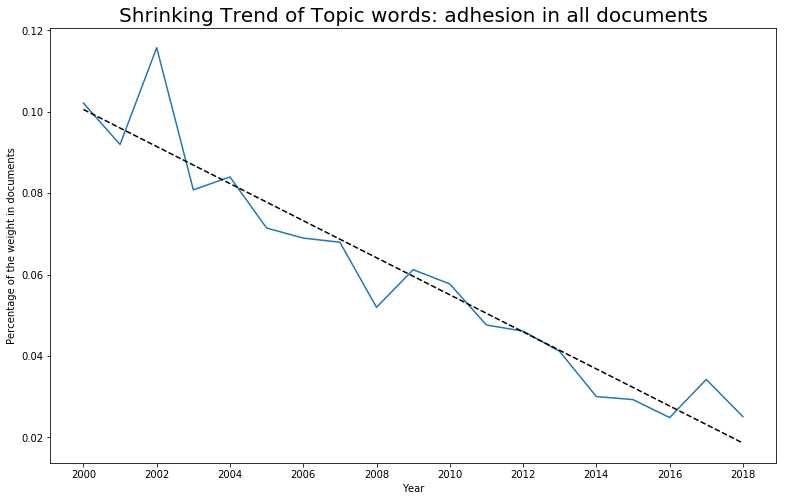

In [35]:
plt.figure(figsize=(13,8))
x=df_res['year']
# y=df_res['polymerization']
y=df_res['adhesion']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Shrinking Trend of Topic words: adhesion in all documents' ,fontsize=20)
plt.savefig('adhesion_linear regression.png')
# plt.ylim(0, 12)

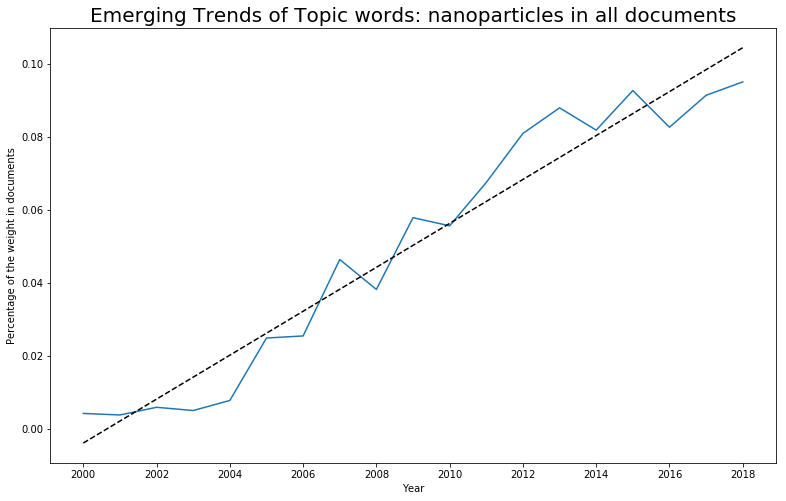

In [36]:
plt.figure(figsize=(13,8))
x=df_res['year']
# y=df_res['implantation']
y=df_res['nanoparticles']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Emerging Trends of Topic words: nanoparticles in all documents' ,fontsize=20)
plt.savefig('nano_linear regression.png')
# plt.ylim(0, 12)

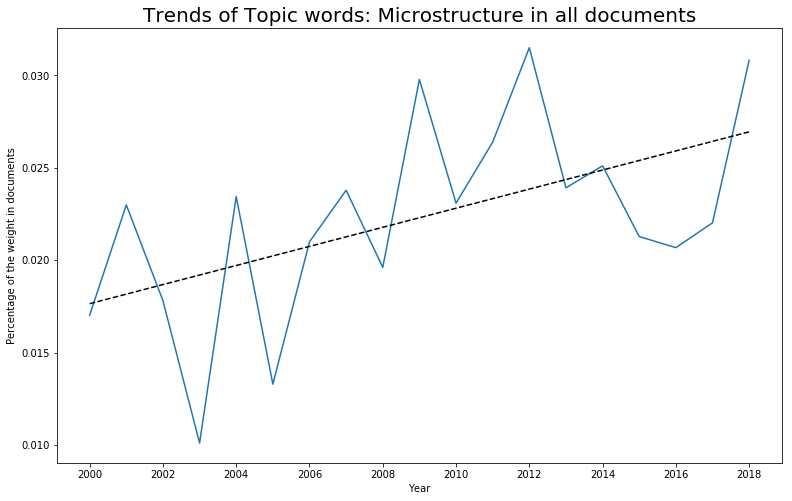

In [62]:
plt.figure(figsize=(13,8))
x=df_res['year']
y=df_res['microstructure']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Trends of Topic words: Microstructure in all documents' ,fontsize=20)
plt.savefig('mic_linear regression.png')
# plt.ylim(0, 12)

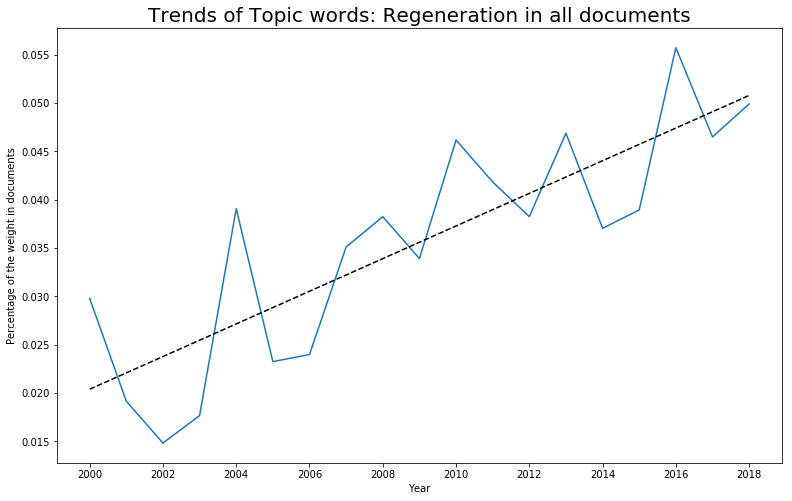

In [63]:
plt.figure(figsize=(13,8))
x=df_res['year']
y=df_res['regeneration']
fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, x, fit_fn(x), '--k')
plt.xticks(np.arange(2000, 2020, 2))
plt.xlabel('Year')
plt.ylabel('Percentage of the weight in documents')
plt.title('Trends of Topic words: Regeneration in all documents' ,fontsize=20)
plt.savefig('reg_linear regression.png')
# plt.xlim(2000, 2020)
# plt.ylim(0, 12)

In [ ]:
# Various line types, plot symbols and colors may be obtained with
#     plot(X,Y,S) where S is a character string made from one element
#     from any or all the following 3 columns:
#              b     blue          .     point              -     solid
#              g     green         o     circle             :     dotted
#              r     red           x     x-mark             -.    dashdot 
#              c     cyan          +     plus               --    dashed   
#              m     magenta       *     star             (none)  no line
#              y     yellow        s     square
#              k     black         d     diamond
#              w     white         v     triangle (down)
#                                  ^     triangle (up)
#                                  <     triangle (left)
#                                  >     triangle (right)
#                                  p     pentagram
#                                  h     hexagram

In [114]:
# from itertools import islice

# def take(n, iterable):
#     "Return first n items of the iterable as a list"
#     return list(islice(iterable, n))

In [144]:
# d = {'a': 3, 'b': 2, 'c': 3, 'd': 4, 'e': 5}
# n_items = take(2, d.items())
# n_items

In [182]:
# import numpy as np
# import matplotlib.pyplot as plt

# x = [1,2,3,4]
# y = [3,5,7,11] # 10, not 9, so the fit isn't perfect

# fit = np.polyfit(x,y,1)
# fit_fn = np.poly1d(fit) 
# # fit_fn is now a function which takes in x and returns an estimate for y

# plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
# plt.xlim(0, 5)
# plt.ylim(0, 12)